In [5]:
import numpy as np
import cv2
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout,  BatchNormalization , Activation
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from keras.models import load_model
import vis ## keras-vis
from vis.utils import utils
from keras.applications.imagenet_utils import preprocess_input ,decode_predictions
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras import backend as K

Using TensorFlow backend.


In [6]:
model = tf.keras.models.load_model('corona.h5')

In [7]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 300, 300, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 300, 300, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 300, 300, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 150, 150, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 150, 150, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 150, 150, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 75, 75, 128)       0     

In [8]:
test_x = np.load('testx1.npy')

In [7]:
test_y = np.load('testy.npy')

In [11]:
test_y = keras.utils.to_categorical(test_y, 3)

In [23]:
model = tf.keras.models.load_model('corona.h5')

In [141]:
# Load pre-trained Keras model and the image to classify
image = test_x[0]
img_tensor = np.expand_dims(image, axis=0)
img_tensor = preprocess_input(img_tensor)

conv_layer = model.get_layer("block5_conv3")
heatmap_model = tf.keras.models.Model([model.inputs], [conv_layer.output, model.output])

# Get gradient of the winner class w.r.t. the output of the (last) conv. layer
with tf.GradientTape() as gtape:
    conv_output, predictions = heatmap_model(img_tensor)
    loss = predictions[:, np.argmax(predictions[0])]
    grads = gtape.gradient(loss, conv_output)
    pooled_grads = K.mean(grads, axis=(0, 1, 2))

heatmap = tf.reduce_mean(tf.multiply(pooled_grads, conv_output), axis=-1)
heatmap = np.maximum(heatmap, 0)
max_heat = np.max(heatmap)
if max_heat == 0:
    max_heat = 1e-10
heatmap /= max_heat

print(heatmap.shape)

(1, 18, 18)


In [142]:
x = test_x[0][None,:,:,:]

In [143]:
img = Image.fromarray(x[0,:,:,:])

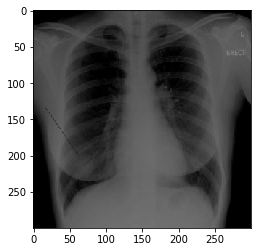

In [144]:
plt.imshow(img)

In [145]:
heatmap = heatmap.reshape((18,18))

In [146]:
heatmap = cv2.resize(heatmap, (300,300))

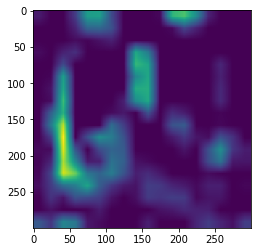

In [147]:
plt.imshow(heatmap)

In [148]:
heatmap= cv2.applyColorMap(np.uint8(255*heatmap), cv2.COLORMAP_JET)

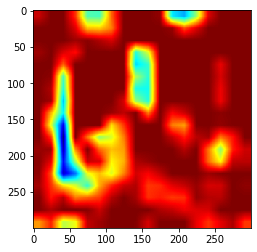

In [149]:
plt.imshow(heatmap)

In [150]:
img = heatmap*0.5 + img

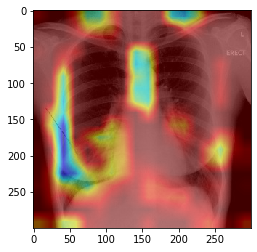

In [151]:
plt.imshow(img.astype(np.uint8))
plt.show()